In [1]:
import pandas as pd
import numpy as np
import ast
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
# modèle
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BD/P2_G5_films.csv.gz', compression = 'gzip', na_values = ['\\N'])

In [3]:
# df_LN = df[df['vote_count_mean'] != 0].drop(['adult', 'production_countries', 'status', 'tagline', 'production_companies_name', 'production_companies_country', 'titleType', 'region', 'Decennie', 'genre', 'final_language', 'popularity', 'year_exact', 'runtime_exact', 'vote_exact', 'arrondi_vote_exact', 'vote_count_mean'], axis = 1)
# df_LN_drop_NA = df_LN.dropna()
# X = df_LN_drop_NA
# y = pd.DataFrame(df_LN_drop_NA)

# def encodage_X(X, type='standard'):
#   X_num = X.select_dtypes('number')
#   X_cat = X.select_dtypes(['object', 'category', 'string'])
#   # Comme ça les dates, on n'y touche pas

#   if type == 'standard':
#     from sklearn.preprocessing import StandardScaler
#     SN = StandardScaler()
#     X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

#   else:
#     from sklearn.preprocessing import MinMaxScaler
#     SN = MinMaxScaler()
#     X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

#   X_cat_dummies = pd.get_dummies(X_cat)
#   X_encoded = pd.concat([X_num_SN.reset_index(), X_cat_dummies.reset_index()], axis=1)

#   return X_encoded, SN

# X_encoded, SN = encodage_X(X)

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.8)

# from sklearn.linear_model import LinearRegression

# modele = LinearRegression()

# modele.fit(X_train, y_train)

# print(f"Score d'entrainement {modele.score(X_train, y_train)}")
# print(f"Score de test {modele.score(X_test, y_test)}")

# df_a_predire = df_test[df_test['vote_count_mean'] == 0].drop(['isOriginalTitle', 'ordering', 'film_id', 'id', 'revenue', 'budget', 'backdrop_path', 'homepage', 'overview', 'poster_path', 'status', 'tagline', 'video', 'titleType', 'types', 'attributes'], axis = 1)
# df_a_predire = df_a_predire.drap('vote_count_mean', axis = 1)
# df_quelonveutpredire = df_a_predire.dropna()

# def encodage_predict(df_a_predire):
#   X_num = df_a_predire.select_dtypes('number')
#   X_cat = df_a_predire.select_dtypes(['object', 'category', 'string'])

#   X_num_SN = pd.DataFrame(SN.transform(X_num), columns=X_num.columns).reset_index(drop=True)

#   X_cat_dummies = pd.get_dummies(X_cat).reset_index(drop=True)
#   X_encoded_predire = pd.concat([X_num_SN.reset_index(), X_cat_dummies.reset_index()], axis=1)

#   df_predict = X_encoded_predire

#   # DataFrame vide qui a les mêmes colonnes que X_encoded
#   df_final = pd.DataFrame(columns=X_encoded.columns)

#   # On veut que le DataFrame ait le même nombre de lignes que df_predict
#   df_final = df_final.reindex(index=df_predict.index)
#   # On met tous les NaN à False
#   df_final = df_final.fillna(False)

#   # On parcourt chaque colonne de df_predict
#   # Si la colonne est présente dans X_encoded alors on la garde
#   # Sinon, on la met à False
#   for column in df_predict.columns:
#     if column in X_encoded.columns:
#       df_final[column] = df_predict[column]

#   return df_final

# df_pour_prediction = encodage_predict(df_quelonveutpredire)

# df_quelonveutpredire['prediction'] = modele.predict(df_pour_prediction)
# df_quelonveutpredire


FONCTION JONATHAN

FONCTIONS

In [4]:
# FONCTION 1

def encodage_X(X, type='standard'):
  from sklearn.preprocessing import StandardScaler
  index = X.index
  X_num = X.select_dtypes('number')
  X_cat = X.select_dtypes(['object', 'category', 'string'])

  if type == 'standard':
    from sklearn.preprocessing import StandardScaler
    SN = StandardScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

  else:
    from sklearn.preprocessing import MinMaxScaler
    SN = MinMaxScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)

  X_cat_dummies = pd.get_dummies(X_cat)
  X_encoded = pd.concat([X_num_SN.reset_index(), X_cat_dummies.reset_index()], axis=1)

  return X_encoded, SN 

# FONCTION 2

def evaluate_k(X_encoded, k_range):
    """
    Évalue différentes valeurs de k en utilisant la somme des distances aux voisins
    et le score de silhouette comme métriques.

    Args:
        X_encoded (DataFrame): Données normalisées
        k_range (range): Plage de valeurs de k à tester

    Returns:
        tuple: (distances moyennes, scores de silhouette)
    """
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans

    avg_distances = []
    silhouette_scores = []

    for k in k_range:
        # Calcul des distances moyennes pour chaque k
        from sklearn.neighbors import NearestNeighbors
        model = NearestNeighbors(n_neighbors=k)
        model.fit(X_encoded)
        distances, _ = model.kneighbors(X_encoded)
        avg_distances.append(np.mean(distances))

        # Calcul du score de silhouette
        # Nous utilisons KMeans pour créer des clusters et évaluer la qualité
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X_encoded)
        if k > 1:  # Le score de silhouette nécessite au moins 2 clusters
            silhouette_scores.append(silhouette_score(X_encoded, clusters))
        else:
            silhouette_scores.append(0)

    return avg_distances, silhouette_scores

# FONCTION 3

def encodage_predict(df_a_predire):
  X_num = df_a_predire.select_dtypes('number')
  X_cat = df_a_predire.select_dtypes(['object', 'category', 'string'])

  X_num_SN = pd.DataFrame(SN.transform(X_num), columns=X_num.columns).reset_index(drop=True)

  X_cat_dummies = pd.get_dummies(X_cat).reset_index(drop=True)
  X_encoded_predire = pd.concat([X_num_SN, X_cat_dummies], axis=1)

  df_predict = X_encoded_predire

  # DataFrame vide qui a les mêmes colonnes que X_encoded
  df_final = pd.DataFrame(columns=X_encoded.columns)

  # On veut que le DataFrame ait le même nombre de lignes que df_predict
  df_final = df_final.reindex(index=df_predict.index)
  # On met tous les NaN à False
  df_final = df_final.fillna(False)

  # On parcourt chaque colonne de df_predict
  # Si la colonne est présente dans X_encoded alors on la garde
  # Sinon, on la met à False
  for column in df_predict.columns:
    if column in X_encoded.columns:
      df_final[column] = df_predict[column]

  return df_final

# FONCTION 4

def pokemons_similaires(film_id):

  # Vérifier si le Pokémon existe dans le dataset
  if film_id not in df['film_id_out_KNN'].values:
      return f"Le Pokémon {film_id} n'est pas dans le dataset."

  # Récupérer les caractéristiques du Pokémon
  pokemon = df[df['film_id_out_KNN'] == film_id]

  # Je recopie ce qu'on a fait avant:
  caract_pokemon = df[df['film_id_out_KNN'] == film_id][caracteristiques]

  caract_pokemon_encoded = encodage_predict(caract_pokemon)

  distances, indices = model.kneighbors(caract_pokemon_encoded)

  return df.iloc[indices[0]].reset_index(drop=True)

In [5]:
caracteristiques = ['adult', 'production_countries', 'status', 'tagline', 'production_companies_name', 'production_companies_country', 'titleType', 'region', 'Decennie', 'genre', 'film_id_out_KNN', 'final_language', 'popularity', 'year_exact', 'runtime_exact', 'vote_exact', 'arrondi_vote_exact', 'vote_count_mean']
X = df.sample(500)[caracteristiques]
recherche = 'Star Wars'
df[df['title_out_KNN'].str.contains(recherche) == True]

film_id = df['film_id_out_KNN'][df['title_out_KNN'].str.contains(recherche) == True].iloc[0]
df_a_predire = df[df['film_id_out_KNN'] == film_id]

In [6]:
# FONCTION 1

X_encoded, SN = encodage_X(X)

# FONCTION 2

k_range = [1, 7, 12]
avg_distances, silhouette_scores = evaluate_k(X_encoded, k_range)

# FONCTION 3

df_final = encodage_predict(df_a_predire)

# FONCTION 4
# On choisit k
k=6

model = NearestNeighbors(n_neighbors=k, metric='euclidean')
model.fit(X_encoded)
pokemons_similaires(film_id)

,adult,backdrop_path_out_KNN,homepage_out_KNN,overview_out_KNN,poster_path_out_KNN,production_countries,status,tagline,production_companies_name,production_companies_country,...,genre,title_out_KNN,film_id_out_KNN,final_language,popularity,year_exact,runtime_exact,vote_exact,arrondi_vote_exact,vote_count_mean
0,False,/sxosjARgDyg35u1aCCBK8YKqTgp.jpg,NaN,"During World War II, a small plane somewhere o...",/8aR8TjqGCHqBWlntgPK2N7nFnNC.jpg,['US'],Released,HUMAN SACRIFICES! SAVAGE TORTURE! VOODOO RITES!,"['Monogram Pictures', 'Sterling Productions In...",[],...,"['Adventure', 'Comedy', 'Horror']",King of the Zombies,tt0033787,"US, fr, en",3.922,1941.0,67.0,5.2,5.0,1301.5
1,False,/aoIhq1EFhpyNC2KCecvCDWHMFSY.jpg,NaN,In a futuristic world that has embraced ape sl...,/tzKZRY2opw5MruSkevffgT5ocun.jpg,['US'],Released,All new! The revolt of the apes. The most awes...,"['APJAC Productions', '20th Century Fox']","['', 'US']",...,"['Action', 'Science Fiction', 'Sci-Fi']",Conquest of the Planet of the Apes,tt0068408,"US, , fr, en",14.849,1972.0,88.0,6.1,6.0,19613.5
2,False,/niPocyCFhwAvRdpgLuuMF0vVYN0.jpg,NaN,Mike Brannon is a former war hero turned midge...,/aZ9uaQO3OVcFeLZ9n2pvKPU7MHX.jpg,['US'],Released,CLARK GABLE - BARBARA STANWYCK - HE'S MISTER S...,['Metro-Goldwyn-Mayer'],[],...,"['Action', 'Romance', 'Sport']",To Please a Lady,tt0043052,"US, fr, en",2.292,1950.0,91.0,6.2,6.0,589.5
3,False,/2jnQmzGRLiwGaWsCjPlTRFEnOCa.jpg,NaN,When the police find Simone seated near her hu...,/4DFUawea0nkBxpkvI5lUgugxgxW.jpg,"['FR', 'IT']",Released,NaN,"['Lira Films', 'Medusa']",[],...,"['Crime', 'Thriller', 'Drama']",Défense de savoir,tt0071451,"fr, IT, \N, FR",1.068,1973.0,99.0,5.8,6.0,97.5
4,False,/5qtOVAcBFogwktkseoZSfZVq6bx.jpg,NaN,Kanji Watanabe is a middle-aged man who has wo...,/dgNTS4EQDDVfkzJI5msKuHu2Ei3.jpg,['JP'],Released,A big story of a little man which will grip yo...,['TOHO'],['JP'],...,['Drama'],生きる,tt0044741,"JP, fr, ja",12.360,1952.0,143.0,8.3,8.0,46200.5
5,False,NaN,NaN,Tolen is after the Harkins ranch where his men...,NaN,[],Released,NaN,[],[],...,"['Action', 'Music', 'Drama']",The Singing Cowgirl,tt0031927,"fr, en",0.624,1938.0,59.0,5.0,5.0,31.5


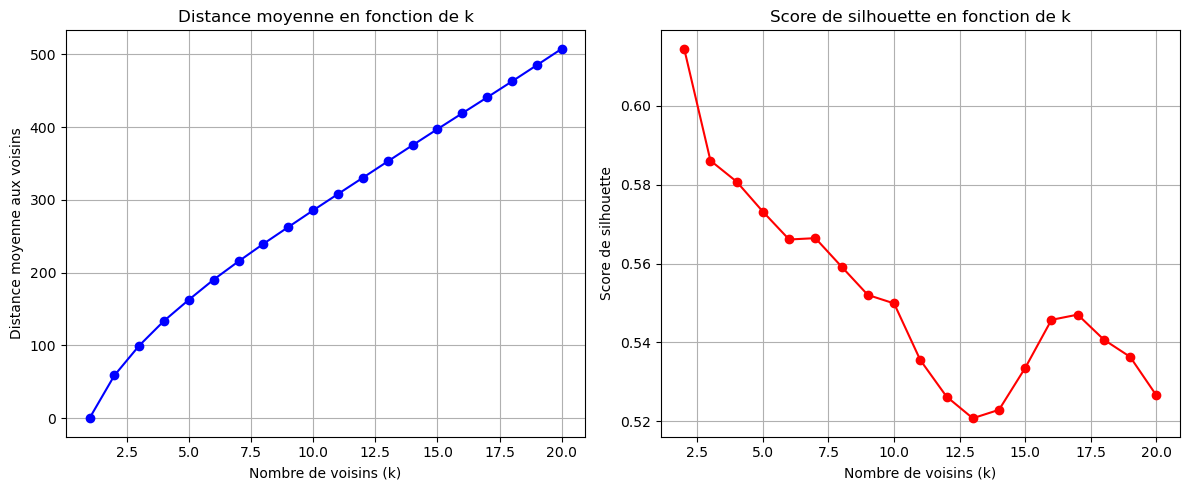

In [7]:
# Définition de la plage de k à tester
k_range = range(1, 21)  # Test des valeurs de k de 1 à 20

# Évaluation des différentes valeurs de k
avg_distances, silhouette_scores = evaluate_k(X_encoded, k_range)

# Création d'une visualisation pour aider à choisir k
plt.figure(figsize=(12, 5))

# Premier graphique : Distance moyenne aux voisins
plt.subplot(1, 2, 1)
plt.plot(k_range, avg_distances, 'bo-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Distance moyenne aux voisins')
plt.title('Distance moyenne en fonction de k')
plt.grid(True)

# Second graphique : Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # On commence à k=2
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de k')
plt.grid(True)

plt.tight_layout()
plt.show()